In [4]:
#imports
import pandas as pd
import numpy as np
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.pipeline import make_pipeline

In [5]:
import platform
platform.uname()

uname_result(system='Linux', node='scc-506', release='4.18.0-553.54.1.el8_10.x86_64', version='#1 SMP Tue May 27 22:49:52 EDT 2025', machine='x86_64')

In [6]:
def clean_email(text: str) -> str:
    text = re.sub(r'<[^>]+>', '', text) # remove HTML tags
    text = re.sub(r'http\S+', '', text) # remove URLs
    # TODO: add a count of URLs to email data
    text = re.sub(r'\d+', '', text) # remove numerical text
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove punctuation
    text = text.lower().strip() # lowercase
    return text

def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    """
    """
    df['clean_email'] = df['body'].astype(str).apply(clean_email)
    return df

In [7]:
df = pd.read_csv('../data/analysis/emails_augmented.csv')  # Update path if necessary
assert 'body' in df.columns and 'label' in df.columns, "Missing required columns."
df = preprocess(df)
X = df['clean_email']
y = df['label']

In [8]:
#Vectorizing
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['clean_email'])
y = df['label']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
results = []

In [ ]:
#Different Models
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
#Logistic Regression with Grid Search and K-fold cross-validation
model = LogisticRegression()

param_grid = [
    {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear'],  # Efficient for sparse text features
        'max_iter': [500]
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['saga'],  # Faster on large data
        'max_iter': [1000]
    }
]
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y) 

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

results.append({
    'Model': 'LogisticRegression()',
    'Best Params': grid_search.best_params_,
    'CV Accuracy': grid_search.best_score_,
    'Test Accuracy': accuracy_score(y_test, y_pred),
    'Test Precision': precision_score(y_test, y_pred, average='weighted'),
    'Test Recall': recall_score(y_test, y_pred, average='weighted'),
    'Test F1': f1_score(y_test, y_pred, average='weighted')
})
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = best_model.predict(X)
print(classification_report(y, y_pred))

In [ ]:
"""
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
"""

In [ ]:
#Gaussian Naive Bayes with Grid Search and K-fold cross-validation
model = MultinomialNB()

param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0],  
    'fit_prior': [True, False]
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

results.append({
    'Model': 'MultinomialNB',
    'Best Params': grid_search.best_params_,
    'CV Accuracy': grid_search.best_score_,
    'Test Accuracy': accuracy_score(y_test, y_pred),
    'Test Precision': precision_score(y_test, y_pred, average='weighted'),
    'Test Recall': recall_score(y_test, y_pred, average='weighted'),
    'Test F1': f1_score(y_test, y_pred, average='weighted')
})

print(classification_report(y_test, y_pred))

In [ ]:
y_pred = best_model.predict(X)
print(classification_report(y, y_pred))

In [ ]:
"""
from sklearn import svm
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)
clf = svm.SVC()
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
"""

In [ ]:
#Support Vector Classification with Grid Search and K-fold cross-validation
model = svm.SVC()

param_grid = [
    {
        'kernel': ['linear'],
        'C': [0.1, 1, 10],
    },
    {
        'kernel': ['rbf'],
        'C': [0.1, 1, 10],
        'gamma': [1e-3, 1e-4]
    }
]

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y) 

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

results.append({
    'Model': 'SVC',
    'Best Params': grid_search.best_params_,
    'CV Accuracy': grid_search.best_score_,
    'Test Accuracy': accuracy_score(y_test, y_pred),
    'Test Precision': precision_score(y_test, y_pred, average='weighted'),
    'Test Recall': recall_score(y_test, y_pred, average='weighted'),
    'Test F1': f1_score(y_test, y_pred, average='weighted')
})

print(classification_report(y_test, y_pred))

In [ ]:
y_pred = best_model.predict(X)
print(classification_report(y, y_pred))

In [ ]:
"""
#default random forest 
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(max_depth=20, random_state=0)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
"""

In [ ]:
#Random forest with Grid Search and K-fold cross-validation
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],              
    'max_depth': [10, 20, None],             
    'max_features': ['sqrt', 'log2'],        
    'min_samples_leaf': [1, 2]               
}

kfold = KFold(n_splits=10, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=kfold,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X, y) 

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

results.append({
    'Model': 'Random Forest Classifier',
    'Best Params': grid_search.best_params_,
    'CV Accuracy': grid_search.best_score_,
    'Test Accuracy': accuracy_score(y_test, y_pred),
    'Test Precision': precision_score(y_test, y_pred, average='weighted'),
    'Test Recall': recall_score(y_test, y_pred, average='weighted'),
    'Test F1': f1_score(y_test, y_pred, average='weighted')
})

print(classification_report(y_test, y_pred))

In [ ]:
y_pred = best_model.predict(X)
print(classification_report(y, y_pred))

In [ ]:
feature_names = np.array(vectorizer.get_feature_names_out())
coefs = model.coef_[0]
top_phishing_idx = np.argsort(coefs)[-10:]
top_legit_idx = np.argsort(coefs)[:10]

In [ ]:
results = pd.DataFrame(results)
print(results)

In [ ]:


# Melt the DataFrame for seaborn
metrics_df = results.melt(id_vars='Model', 
                             value_vars=['Test Accuracy', 'Test Precision', 'Test Recall', 'Test F1'], 
                             var_name='Metric', 
                             value_name='Score')

plt.figure(figsize=(10,6))
sns.barplot(data=metrics_df, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW
from transformers import BertTokenizer, BertForSequenceClassification, get_linear_schedule_with_warmup
import pandas as pd
from sklearn.model_selection import train_test_split
from tqdm import tqdm
 

df = pd.read_csv('../data/analysis/emails_augmented.csv')
print(df.head())


train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)


tokenizer = BertTokenizer.from_pretrained('bert-large-uncased')


class EmailDataset(Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.df = df
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = str(self.df.iloc[idx]['body_no_stopwords'])
        label = int(self.df.iloc[idx]['label'])
        encodings = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        input_ids = encodings['input_ids'].squeeze()
        attention_mask = encodings['attention_mask'].squeeze()
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': torch.tensor(label)
        }


train_ds = EmailDataset(train_df, tokenizer)
val_ds = EmailDataset(val_df, tokenizer)

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=8)


num_labels = df['label'].nunique()
model = BertForSequenceClassification.from_pretrained(
    'bert-large-uncased',
    num_labels=num_labels
)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)


optimizer = AdamW(model.parameters(), lr=2e-5)
total_steps = len(train_loader) * 3  # 3 epochs
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)


for epoch in range(6):
    print(f"Epoch {epoch+1}")

    model.train()
    total_loss = 0

    for batch in tqdm(train_loader):
        optimizer.zero_grad()

        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )

        loss = outputs.loss
        total_loss += loss.item()

        loss.backward()
        optimizer.step()
        scheduler.step()

    avg_train_loss = total_loss / len(train_loader)
    print(f"Train Loss: {avg_train_loss:.4f}")


    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)

            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )

            preds = torch.argmax(outputs.logits, dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    acc = correct / total
    print(f"Validation Accuracy: {acc:.2%}")

model.save_pretrained('./phishing-bert-model')
tokenizer.save_pretrained('./phishing-bert-model')
print("Model saved to ./phishing-bert-model")


/projectnb/rise-phishing/connorhl/.conda/envs/phishing_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   Unnamed: 0                                            subject  \
0           0                          Never agree to be a loser   
1           1                             Befriend Jenna Jameson   
2           2                               CNN.com Daily Top 10   
3           3  Re: svn commit: r619753 - in /spamassassin/tru...   
4           4                         SpecialPricesPharmMoreinfo   

                                                body  label  num_urls  \
0  Buck up, your troubles caused by small dimensi...      1         1   
1  \nUpgrade your sex and pleasures with these te...      1         1   
2  >+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+=+...      1        29   
3  Would anyone object to removing .so from this ...      0       939   
4  \nWelcomeFastShippingCustomerSupport\nhttp://7...      1         1   

   num_words  num_chars_foreign  num_chars_special  num_urgent_words  \
0         46                  0                 13                 0   
1       

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-large-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1


100%|██████████| 8206/8206 [14:47<00:00,  9.25it/s]  


Train Loss: 0.1031
Validation Accuracy: 98.03%
Epoch 2


100%|██████████| 8206/8206 [14:44<00:00,  9.27it/s]  


Train Loss: 0.0281
Validation Accuracy: 99.18%
Epoch 3


100%|██████████| 8206/8206 [14:44<00:00,  9.28it/s]  


Train Loss: 0.0080
Validation Accuracy: 99.31%
Epoch 4


100%|██████████| 8206/8206 [14:43<00:00,  9.28it/s]  


Train Loss: 0.0030
Validation Accuracy: 99.31%
Epoch 5


100%|██████████| 8206/8206 [14:44<00:00,  9.28it/s] 


Train Loss: 0.0028
Validation Accuracy: 99.31%
Epoch 6


100%|██████████| 8206/8206 [14:44<00:00,  9.28it/s]  


Train Loss: 0.0031
Validation Accuracy: 99.31%
Model saved to ./phishing-bert-model


Saved confusion matrix with counts and percentages to BERT_confusion_matrix.png


NameError: name 'OUTPUT_LC' is not defined

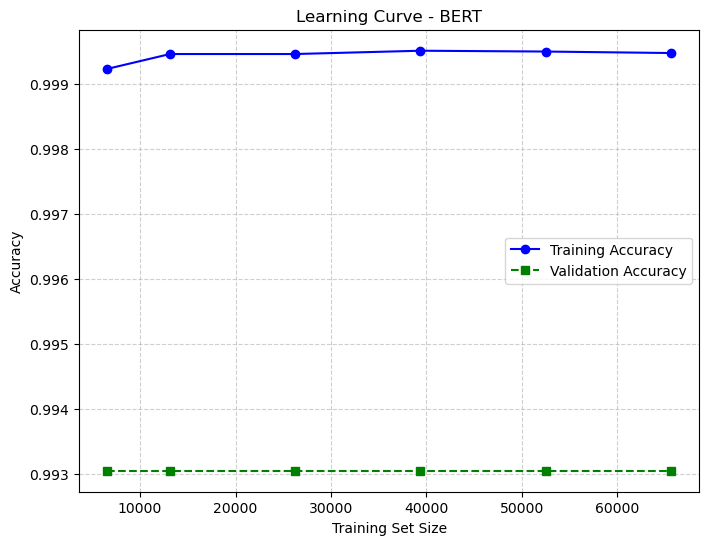

In [10]:
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertForSequenceClassification

# --- Paths ---
MODEL_PATH = "./phishing-bert-model"
DATA_PATH = "../data/analysis/emails_augmented.csv"
OUTPUT_CM = "BERT_confusion_matrix.png"

# --- Load Model and Tokenizer ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained(MODEL_PATH).to(device)
tokenizer = BertTokenizer.from_pretrained(MODEL_PATH)
model.eval()

# --- Dataset Class ---
class EmailDataset(torch.utils.data.Dataset):
    def __init__(self, df, tokenizer, max_len=128):
        self.df = df
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = str(self.df.iloc[idx]["body_no_stopwords"])  # or "body" if you want full text
        label = int(self.df.iloc[idx]["label"])
        encodings = self.tokenizer(
            text,
            truncation=True,
            padding="max_length",
            max_length=self.max_len,
            return_tensors="pt"
        )
        return {
            "input_ids": encodings["input_ids"].squeeze(),
            "attention_mask": encodings["attention_mask"].squeeze(),
            "labels": torch.tensor(label)
        }

# --- Load Data ---
df = pd.read_csv(DATA_PATH)
val_df = df.sample(frac=0.2, random_state=42)  # mimic validation set
val_ds = EmailDataset(val_df, tokenizer)
val_loader = DataLoader(val_ds, batch_size=16)

# --- Collect Predictions ---
y_true, y_pred = [], []

with torch.no_grad():
    for batch in val_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)
cm_sum = np.sum(cm)
cm_perc = cm / cm_sum * 100

labels = np.array([["TN", "FP"], ["FN", "TP"]])
annot = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        c = cm[i, j]
        p = cm_perc[i, j]
        label = labels[i, j]
        annot[i, j] = f"{label}\n{c}\n{p:.1f}%"

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=annot,
    fmt="",
    cmap="Blues",
    cbar=False,
    xticklabels=[0, 1],
    yticklabels=[0, 1],
    linewidths=1,
    linecolor="black",
    square=True
)
plt.title("BERT - Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.savefig(OUTPUT_CM, dpi=300, bbox_inches="tight")
plt.close()

print(f"Saved confusion matrix with counts and percentages to {OUTPUT_CM}")


# --- Learning Curve ---
train_sizes = [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]
train_scores, val_scores = [], []

for frac in train_sizes:
    frac_train_df = train_df.sample(frac=frac, random_state=42) if frac < 1.0 else train_df.copy()
    frac_train_ds = EmailDataset(frac_train_df, tokenizer)
    frac_train_loader = DataLoader(frac_train_ds, batch_size=16)

    # Training Accuracy
    y_true_train, y_pred_train = [], []
    with torch.no_grad():
        for batch in frac_train_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            y_true_train.extend(labels.cpu().numpy())
            y_pred_train.extend(preds.cpu().numpy())

    train_acc = accuracy_score(y_true_train, y_pred_train)

    # Validation Accuracy
    y_true_val, y_pred_val = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            labels = batch["labels"].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            preds = torch.argmax(outputs.logits, dim=1)
            y_true_val.extend(labels.cpu().numpy())
            y_pred_val.extend(preds.cpu().numpy())

    val_acc = accuracy_score(y_true_val, y_pred_val)

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Plot Learning Curve
plt.figure(figsize=(8,6))
plt.plot(np.array(train_sizes) * len(train_df), train_scores, 'o-', color="blue", label="Training Accuracy")
plt.plot(np.array(train_sizes) * len(train_df), val_scores, 's--', color="green", label="Validation Accuracy")
plt.title("Learning Curve - BERT")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig(OUTPUT_LC, dpi=300, bbox_inches="tight")
plt.close()
print(f"Saved learning curve to {OUTPUT_LC}")

In [1]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torch.nn.functional as F

# Load model and tokenizer
model = BertForSequenceClassification.from_pretrained('./phishing-bert-model')
tokenizer = BertTokenizer.from_pretrained('./phishing-bert-model')
model.eval()

def classify_email(email_text):
    inputs = tokenizer(email_text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    with torch.no_grad():
        logits = model(**inputs).logits
        probs = F.softmax(logits, dim=1).squeeze().numpy()
    label = int(probs.argmax())
    return label, probs


/projectnb/rise-phishing/connorhl/.conda/envs/phishing_env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import openai
from openai import OpenAI
from dotenv import load_dotenv
import os

load_dotenv()
OPENAI_API_KEY = os.getenv('OPENAI_API')

client = OpenAI(api_key=OPENAI_API_KEY)

def gpt_explanation(email_text):
    prompt = f"""The following email was classified as a phishing attempt. Explain in one sentence why:
"{email_text}"
"""

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a cybersecurity analyst trained to explain phishing emails."},
            {"role": "user", "content": prompt}
        ],
        temperature=0.3,
        max_tokens=100,
    )

    return response.choices[0].message.content.strip()


In [ ]:
print("Explanation:", gpt_explanation(email_text))


In [ ]:
from transformers import pipeline, BertTokenizer, BertForSequenceClassification
import shap

# Load model and tokenizer
model = BertForSequenceClassification.from_pretrained('./phishing-bert-model')
tokenizer = BertTokenizer.from_pretrained('./phishing-bert-model')

# Create a transformers pipeline (SHAP expects this)
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer, return_all_scores=True)

# Email example
email_text = """
Can anyone help with the following:

I get:

 > mcmcsamp(txt.lmer3f)
Markov Chain Monte Carlo (MCMC) output:
Start = 1
End = 1
Thinning interval = 1
....

But:

 > mcsamp(txt.lmer3f)
Error in as.bugs.array(sims, program = ""lmer"", n.iter = n.iter,  
n.burnin = n.burnin,  :
	error in parameter sigma.s in parameters.to.save


I had attached the arm package:
 > library(arm)
Loading required package: R2WinBUGS

arm (Version 1.0-15, built: 2007-3-17)
Working directory is /Users/mk/Documents/projects/Mike/prediss/Exp-Text
Loading required package: foreign

 > sessionInfo()
R version 2.4.1 (2006-12-18)
i386-apple-darwin8.8.1

locale:
C

attached base packages:
[1] ""tools""     ""grid""      ""datasets""  ""stats""     ""graphics""   
""grDevices"" ""utils""     ""methods""
[9] ""base""

other attached packages:
      foreign          arm    R2WinBUGS         coda         
Hmisc      gmodels      effects         lme4
     ""0.8-18""     ""1.0-15""      ""2.0-4""     ""0.10-7""      ""3.2-1""      
""2.13.2""      ""1.0-9""  ""0.9975-13""
       Matrix          car       weaver    codetools        
digest       xtable latticeExtra      lattice
""0.9975-11""      ""1.2-1""      ""1.0.1""      ""0.0-3""      ""0.2.3""       
""1.4-3""      ""0.1-4""    ""0.14-17""
     gridBase         MASS          JGR       iplots        
JavaGD        rJava
      ""0.4-3""     ""7.2-33""     ""1.4-15""      ""1.0-5""      ""0.3-6""      
""0.4-14""

Thanks,
MK
"""

# SHAP Explainer
explainer = shap.Explainer(pipe, shap.maskers.Text(tokenizer))
shap_values = explainer([email_text])  # must be list[str]

# Plot
shap.plots.text(shap_values[0])


In [ ]:
print("\nTop indicative words for phishing:")
for word, coef in zip(feature_names[top_phishing_idx], coefs[top_phishing_idx]):
    print(f"{word}: {coef:.4f}")

print("\nTop indicative words for legitimate:")
for word, coef in zip(feature_names[top_legit_idx], coefs[top_legit_idx]):
    print(f"{word}: {coef:.4f}")

In [ ]:
pipeline = make_pipeline(vectorizer, model)
explainer = lime.lime_text.LimeTextExplainer(class_names=['Legitimate', 'Phishing'])

In [ ]:
import random
idx = random.randint(0, len(df) - 1)
print("\nExplaining instance:", df['clean_email'].iloc[idx])
exp = explainer.explain_instance(df['clean_email'].iloc[idx], pipeline.predict_proba, num_features=10)

In [ ]:
import os
output_dir = './generated'
os.makedirs(output_dir, exist_ok=True)
exp.save_to_file(os.path.join(output_dir, 'lime_explanation.html'))

In [ ]:
import joblib
joblib.dump(model, './generated/phishing_model.pkl')
joblib.dump(vectorizer, './generated/tfidf_vectorizer.pkl')

print("\nModel and vectorizer saved.")